In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [8]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

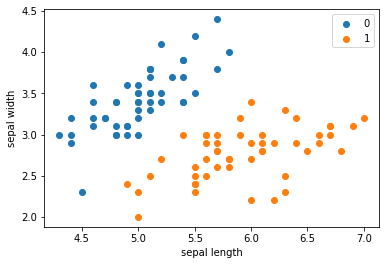

In [9]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [10]:
data = np.array(df.iloc[:100, [0, 1, -1]])
x, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [11]:
# 定义感知机类
class perceptron:
    def __init__(self,x,y,lr=0.1):
        self.x=x
        self.y=y
        self.lr=lr
        self.w=np.ones(x.shape[1],dtype=np.float32)
        self.b=0
        
    def SGD(self): #随机梯度下降
        while True:
            error_count=0
            for d in range(len(self.x)):
                if self.y[d]*(np.dot(self.x[d],self.w) + self.b)<=0:
                    error_count+=1
                    self.w=self.w+self.lr*np.dot(y[d],x[d])
                    self.b=self.b+self.lr*y[d]
            if error_count==0: #没有误分类点，则循环结束
                break
        
        return 'SGD success'

In [12]:
model=perceptron(x,y)

In [13]:
model.SGD()

'SGD success'

/var/folders/v3/nj7n2g_96_j8fj8mnl0nsb5c0000gn/T/ipykernel_9585/1980949012.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
/var/folders/v3/nj7n2g_96_j8fj8mnl0nsb5c0000gn/T/ipykernel_9585/1980949012.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


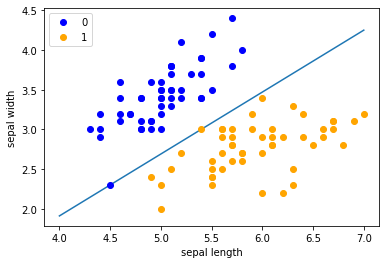

In [14]:
x_points = np.linspace(4, 7, 10)
y_ = -(model.w[0] * x_points + model.b) / model.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 使用sklearn库计算

In [4]:
from sklearn.linear_model import Perceptron

### sklearn.Perceptron 主要参数分析
**penalty**:是否加上惩罚项，默认为False  
**fit_intercept**:是否对截距项b进行估计，False时数据应是中心化的  
**max_iter**:最大迭代次数  
**tol**:默认为$10^{-3}$ ，若不为None则当上一次的误差减去此次误差小于tol时就会停止迭代  
**shuffle**:每轮训练是否打乱数据

In [16]:
model2=Perceptron(tol=None)

In [17]:
model2.fit(x,y) # 使用fit方法，开始训练

Perceptron(tol=None)

In [18]:
print(model2.coef_) # 输出权重w
print(model2.intercept_) # 输出截距b

[[ 70.7 -87.9]]
[-117.]


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40482 (\N{CJK UNIFIED IDEOGRAPH-9E22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23614 (\N{CJK UNIFIED IDEOGRAPH-5C3E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/pytor

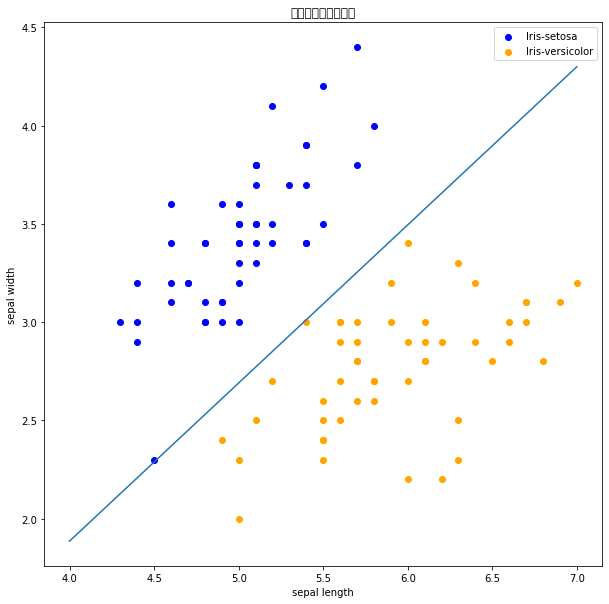

In [21]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(model2.coef_[0][0]*x_ponits + model2.intercept_)/model2.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()